# Yoonhyuck WOO / Purdue University_Computer and Information Technology
# Title: **Homework 2**
Due by **October 31th, 2023**
# Professor: Jin Wei-Kocsis, Ph.D.

**Question 1**: In this problem, we will focus on an hand-written digit recognition task for MNIST dataset. In this problem, you are asked to design a Fully-Connected Neural Network (FCNN) with two Dense hidden layers. The first hidden layer has 10 computing units and the second hidden layer has 20 computing units.

Requirments:
*   You need to include the following three components in your homework solution: (1) the codes, (2) the obtained training error, and (3) the obtained testing error.

*Hints*:
1.   This problem can be modeled as multi-class classification task.
2.   Download MNIST fashion dataset can be realized via:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
3.   The loss function can be formulated via: tf.keras.losses.SparseCategoricalCrossentropy



In [1]:
# import the tensorflow and other libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

#printing the shapes of the vectors
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [6]:
# Design a fully-connected neural network with one input layer with two nodes, one hidden layer with two nodes, and one output layer with one node (totally three layers)
model = models.Sequential()
model.add(layers.Normalization(input_shape = [784,], axis = None))
model.add(layers.Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(layers.Dense(20, activation = 'relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model.add(layers.Dense(10, activation = 'softmax', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 784)               3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 8283 (32.36 KB)
Trainable params: 8280 (32.34 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [7]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
# Compile and training the fully-connected NN model

with tf.device(device_name):
  tf.config.get_visible_devices()
  adam = optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer = adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs = 150,
                    validation_data=(X_test, y_test))

Epoch 1/150
1875/1875 [==============================] - 11s 4ms/step - loss: 1.7186 - accuracy: 0.5547 - val_loss: 1.2584 - val_accuracy: 0.7774
Epoch 2/150
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0643 - accuracy: 0.8308 - val_loss: 0.8976 - val_accuracy: 0.8683
Epoch 3/150
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8129 - accuracy: 0.8778 - val_loss: 0.7231 - val_accuracy: 0.8900
Epoch 4/150
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6798 - accuracy: 0.8934 - val_loss: 0.6227 - val_accuracy: 0.8982
Epoch 5/150
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5971 - accuracy: 0.9028 - val_loss: 0.5570 - val_accuracy: 0.9066
Epoch 6/150
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5407 - accuracy: 0.9091 - val_loss: 0.5119 - val_accuracy: 0.9130
Epoch 7/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4994 - accuracy: 0.9135 - val_loss: 0.4763 - val

:# Train error & Test error & Accuracy

# Train_error 0.1736055 	 Train Accuracy: 0.9611167
# Test Error: 0.2633658 	 Test Accuracy: 0.9371

313/313 - 1s - loss: 0.2634 - accuracy: 0.9371 - 1s/epoch - 3ms/step
Train_error 0.1736055 	 Train Accuracy: 0.9611167
Test Error: 0.2633658 	 Test Accuracy: 0.9371


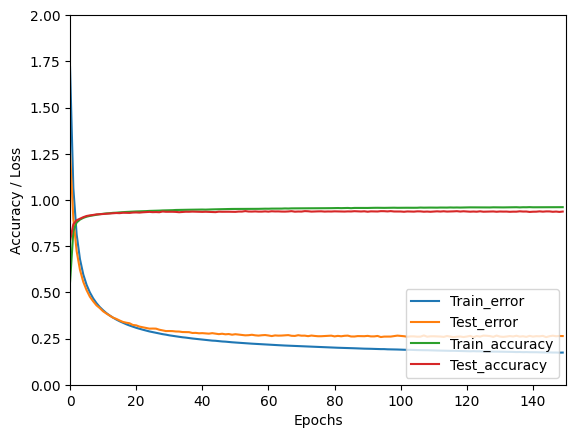

In [19]:
# Evaluate the fully connected neural network Model
plt.plot(history.history['loss'], label='Train_error')
plt.plot(history.history['val_loss'], label = 'Test_error')
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history.history['loss'])])
plt.ylim([0, 2])
plt.legend(loc='lower right')

results = model.evaluate(X_test,  y_test, verbose=2)

Train_error = history.history['loss']
Train_error = min(Train_error)

Train_Accuracy = history.history['accuracy']
Train_Accuracy = max(Train_Accuracy)

print('Train_error', round(Train_error, 7), '\t', 'Train Accuracy:',  round(Train_Accuracy, 7))
print('Test Error:', round(results[0], 7), '\t', 'Test Accuracy:',  round(results[1], 7))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_crossentropy', 'accuracy', 'val_loss', 'val_sparse_categorical_crossentropy', 'val_accuracy'])
